In [66]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

## Part 1 - Verify Equation #1

<!-- Pretty sure z_0 oughta be < 1 so I made it a 0 instead.  I'd email to ask, but it's 11:40PM Thursday night... ¯\_(ツ)_/¯ -->

Given $f(z) = z^2 + 1$ and $z_0 = 0$,

$$
    \frac{1}{2 \pi i} \int_0^{2\pi} \frac{f(e^{i\theta})}{e^{i\theta}- z_0}ie^{i\theta}d\theta
$$

$$
    = \frac{1}{2 \pi i} \int_0^{2\pi} \frac{e^{2i\theta} + 1}{e^{i\theta}}ie^{i\theta}d\theta
$$

$$
    = \frac{1}{2 \pi} \int_0^{2\pi} e^{2i\theta} + 1d\theta
$$

$$
    = \frac{1}{2\pi} \left[ \frac{e^{2i\theta}}{2i} + \theta \text{ } \right|_0^{2\pi}
$$

$$
    = \frac{1}{2\pi} \left( \frac{1}{2i} + 2\pi - \frac{1}{2i} - 0 \right)
$$

$$
    = 1 = f(z_0)
$$

## Part 2 - Trapezoidal Rule

In [84]:
# num quadrature points
N = 100
# function to integrate
f = lambda z : z**2 + 1
# z0 (point in C, must be within unit circle)
z0 = complex(0,0)

In [89]:
def complex_trapezoidal (f, N, z0) :
    # declare constant
    i = complex(0,1)
    
    # discretize theta uniformly on N quadrature points
    theta = np.linspace(0, 2*np.pi,N)
    # helper function - g(theta) is the integrand in equation (1) but i pulled out the i/i
    g = lambda theta : 1 / (2 * np.pi) * f(cmath.exp(i*theta)) / (cmath.exp(i*theta) - z0) * cmath.exp(i*theta)
    
    # sum over trapezoids
    trap = np.sum([g(theta[j-1]) + g(theta[j]) for j in range(1,N)])
    # scale by grid size
    trap = trap * (2 * np.pi - 0) / (2 * N)
    
    return trap

In [90]:
# testing
print(f(z0))
complex_trapezoidal(f, N, z0)

(1+0j)


(0.99+1.7875326052294235e-17j)

## Part 3 - Convergence Study

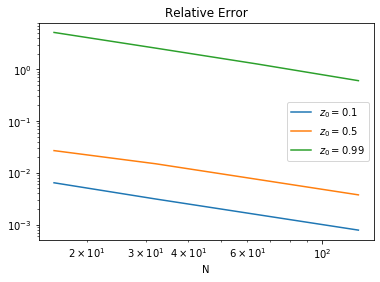

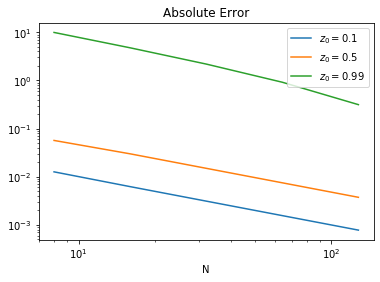

In [119]:
f = lambda z : cmath.sin(z)
z0s = [0.1, 0.5, 0.99]
Ns = [8, 16, 32, 64, 128]

# plot relative error over increasing N for range of z0
fig1 = plt.figure(1)
relative_plot = fig1.add_subplot()
relative_plot.title.set_text("Relative Error")
relative_plot.xaxis.label.set_text("N")
# plot absolute error over increasing N for range of z0
fig2 = plt.figure(2)
absolute_plot = fig2.add_subplot()
absolute_plot.title.set_text("Absolute Error")
absolute_plot.xaxis.label.set_text("N")

for z0 in z0s:

    relative_error = []
    absolute_error = []
    
    for N in Ns:
        approximation = complex_trapezoidal(f, N, z0)

        exact = f(z0)
        absolute_error.append(abs(exact - approximation))

        # why are we asked to plot relative error when absolute error is available?
        if(N != Ns[0]):
            relative_error.append(abs(approximation - old_approximation))
        old_approximation = approximation

    absolute_plot.loglog(Ns, absolute_error, label=r"$z_0 = $"+str(z0))
    relative_plot.loglog(Ns[1:],relative_error, label=r"$z_0 = $"+str(z0))
    
relative_plot.legend()
absolute_plot.legend()

## Part 4 - Residue

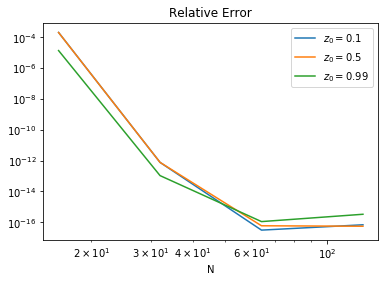

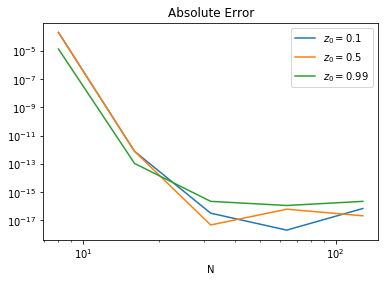

In [124]:
f = lambda z : cmath.sin(z)
g = lambda z : complex(1,0)
z0s = [0.1, 0.5, 0.99]
Ns = [8, 16, 32, 64, 128]

# plot relative error over increasing N for range of z0
fig1 = plt.figure(1)
relative_plot = fig1.add_subplot()
relative_plot.title.set_text("Relative Error")
relative_plot.xaxis.label.set_text("N")
# plot absolute error over increasing N for range of z0
fig2 = plt.figure(2)
absolute_plot = fig2.add_subplot()
absolute_plot.title.set_text("Absolute Error")
absolute_plot.xaxis.label.set_text("N")

for z0 in z0s:

    relative_error = []
    absolute_error = []
    
    for N in Ns:
        numerator = complex_trapezoidal(f, N, z0)
        denominator = complex_trapezoidal(g, N, z0)
        approximation = numerator / denominator
        
        exact = f(z0)
        absolute_error.append(abs(exact - approximation))

        # why are we asked to plot relative error when absolute error is available?
        if(N != Ns[0]):
            relative_error.append(abs(approximation - old_approximation))
        old_approximation = approximation

    absolute_plot.loglog(Ns, absolute_error, label=r"$z_0 = $"+str(z0))
    relative_plot.loglog(Ns[1:],relative_error, label=r"$z_0 = $"+str(z0))
    
relative_plot.legend()
absolute_plot.legend()

This time around, the rate of convergence slows rapidly as we add more and more quadrature nodes, and seems to be independent of the chosen $z_0$.